<a href="https://colab.research.google.com/github/CrowdSalat/ann-dynamical-systems/blob/master/prepocess_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# preprocess data

## pip install (normal jupyter only)

In [0]:
## only be relevant for 'not colab' notebooks. colab got these pre installed. 
#! pip3 install pandas
#! pip3 install matplotlib
#! pip3 install googledrivedownloader
#! pip3 install requests #for googledrivedownloader
#! pip3 install pandas
#! pip3 install scikit-learn
##consider using conda as package manager, because it uses already compiled libs.
## tf is considerably faster when installed with conda according to: TODO find website..
#! pip3 install tensorflow 


## imports

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
import os, sys
import csv
import time
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## load csv files 

In [0]:

data0 = 'dataset_00.csv'
data1 = 'dataset_01.csv'
data2 = 'dataset_02.csv'
data3 = 'dataset_03.csv'
data4 = 'dataset_04.csv'
files = [data0, data1, data2, data3, data4]

### in collab 
just mount the drive to access the files:

In [0]:
from google.colab import drive
def get_files_in_colab():
  drive.mount('/content/drive')

  root_dir = '/content/drive/My Drive/xplane_data' 
  os.chdir(root_dir)
  print ('working dir: ' + os.getcwd())


get_files_in_colab()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
working dir: /content/drive/My Drive/xplane_data


### in normal jupyter notebook 
download the files from google drive to your local working directory:


In [0]:
def get_files_jupyter_normal():
  root_dir = os.getcwd()

  if not os.path.exists('./data'):
    os.mkdir('./data')

  os.chdir('./data')

  print ('working dir: ' + root_dir)


  gdd.download_file_from_google_drive(file_id='14qCHOrPH8aDUY_AvzzYpORNhW0PFXkC_',
                                      dest_path='./'+file_mismatch,
                                      )

  gdd.download_file_from_google_drive(file_id='1h6y6kWLPduY_gKPM0-GVt4t57uF1_Wr6',
                                      dest_path='./'+file0,
                                      )

  gdd.download_file_from_google_drive(file_id='1twaC4u2at1Zo6_Sr6gJNTT5Q6D2hwLfO',
                                      dest_path='./'+data0,
                                      )

  gdd.download_file_from_google_drive(file_id='1vF_WVJV8QRXSEjetgJ-5-xn1xz8JqrMJ',
                                      dest_path='./'+data1,
                                      )

  gdd.download_file_from_google_drive(file_id='1Jenfbg0nyXy4GgN4fkkZxwzlTfcugFvj',
                                      dest_path='./'+data2,
                                      )

  gdd.download_file_from_google_drive(file_id='1rN6oL_-xbc0MIC2KJnPLC0f-sKB__XTm',
                                      dest_path='./'+data3,
                                      )

  gdd.download_file_from_google_drive(file_id='196MwQMZd-bbixS0r8OwRU0UwVrRSZ4G5',
                                      dest_path='./'+data4,
                                      )

  #alternativly save all as zip an extract them:
  #gdd.download_file_from_google_drive(file_id='',
  #                                    dest_path='./data/traindata.zip',
  #       

## check and parse csv data

Following xplane dataoutputs are activated:

1   Times

3   Speeds

4   Mach, VVI, g-loads 

8   Joystick aileron, elevator, and rudder input 

10  Artificial stability inputs for aileron, elevator, and rudder

11  Flight control deflections for aileron, elevator, and rudder 

15  Angular moments (Not in use)

16  Angular velocities 

17  Pitch, roll, headings

18  Angle of attack, sideslip, and paths (Not in use)

20  Latitude, longitude, and altitude

138 Servo aileron/elevator/rudder

### check for formatation error and print headers

In [0]:
# xplane somehow messes up the csv files, therefor check if column count in head and data machtes
# if so, save all header names in list and print them
print ('working dir: ' + os.getcwd())

headers = {}

for file in files:
  with open(file) as csvfile:
    csvreader = csv.reader(csvfile, delimiter='|')
    header = next(csvreader)
    data =next(csvreader)
    if len(header) == len(data): 
      header = header[:-1] # last on in header and data is just space
      headers[file] = header
      print(file + ': is ok.' )
    else:
      print(file + ': got mismatched header and data columns.' )

for header_val in headers.values():
  print(header_val)

print('')


working dir: /content/drive/My Drive/xplane_data
dataset_00.csv: is ok.
dataset_01.csv: is ok.
dataset_02.csv: is ok.
dataset_03.csv: is ok.
dataset_04.csv: is ok.
['  _real,_time ', '   _totl,_time ', '   missn,_time ', '   timer,_time ', '   _zulu,_time ', '   local,_time ', '   hobbs,_time ', '   _Vind,_kias ', '   _Vind,_keas ', '   Vtrue,_ktas ', '   Vtrue,_ktgs ', '   _Vind,__mph ', '   Vtrue,mphas ', '   Vtrue,mphgs ', '   _Mach,ratio ', '   __VVI,__fpm ', '   Gload,norml ', '   Gload,axial ', '   Gload,_side ', '   _elev,stick ', '   ailrn,stick ', '   ruddr,stick ', '   _elev,astab ', '   ailrn,astab ', '   ruddr,astab ', '   _elev,_surf ', '   ailrn,_surf ', '   ruddr,_surf ', '   nwhel,steer ', '   ____M,_ftlb ', '   ____L,_ftlb ', '   ____N,_ftlb ', '   ____Q,rad/s ', '   ____P,rad/s ', '   ____R,rad/s ', '   pitch,__deg ', '   _roll,__deg ', '   hding,_true ', '   hding,__mag ', '   alpha,__deg ', '   _beta,__deg ', '   hpath,__deg ', '   vpath,__deg ', '   _slip,__deg ', 

### column definition

In [0]:
col_m_time      = '   missn,_time '
col_t_time      = '   _totl,_time '
col_yaw_v       = '   ____Q,rad/s '
col_heading_mag = '   hding,__mag '
col_yaw_deg     = '   _beta,__deg '
col_roll_deg    = '   _roll,__deg '
col_roll_v      = '   ____R,rad/s '
col_pitch_deg   = '   pitch,__deg '
col_pitch_v     = '   ____P,rad/s '
col_alt         = '   __alt,ftmsl '
col_vv          = '   __VVI,__fpm '
col_v           = '   Vtrue,_ktas '
col_rpm_prop    = '   rpm_1,_prop '
col_throttle     = '   thro1,_part '

cols_state = [ 
    col_yaw_v,
    col_yaw_deg,
    col_roll_deg,
    col_roll_v,
    col_pitch_deg,
    col_pitch_v,
    col_vv,
    col_alt,
    col_v,
    col_rpm_prop,
    col_throttle,
]

cols_time = [
    col_m_time,
    col_t_time,
]

col_elev_servo                  = '   _elev,servo '
col_ailrn_servo                  = '   ailrn,servo '
col_ruddr_servo                  = '   ruddr,servo '

cols_action = [
    col_elev_servo,
    col_ailrn_servo,
    col_ruddr_servo
]

# all input columns
columns = []
columns.extend(cols_time)
columns.extend(cols_state)
columns.extend(cols_action)

# orga column
col_dataset_index = 'dataset_index'

col_maneuver_index = 'maneuver_index'
col_maneuver_name = 'maneuver_name'
col_maneuver_datapoint_index = 'maneuver_datapoint_index'
col_maneuver_type = 'maneuver_type'


# labels will be set later
cols_label = None


def append_organizing_columns(df: pd.DataFrame):
  df.insert(1, col_maneuver_index, 0)
  df.insert(2, col_maneuver_name, 0)
  df.insert(3, col_maneuver_type, 0)
  df.insert(4, col_maneuver_datapoint_index, 0)

### load datasets


In [0]:
def load_xplane_csv(csv_path, columns):
    return pd.read_csv(csv_path, delimiter='|', usecols = columns,
                       float_precision='high')

dfs = []
dfs_len = 0
for index, file in enumerate(files):
  df = load_xplane_csv(file, columns=columns)
  df.insert(0, col_dataset_index, index)
  dfs.append(df)
  print(file, len(df))
  dfs_len += len(df)


dataset_00.csv 20943
dataset_01.csv 37690
dataset_02.csv 125032
dataset_03.csv 49965
dataset_04.csv 146908


### concatinate datasets

In [0]:
df = pd.concat(dfs, ignore_index=True)
print(len(df))

380538


## preprocess data

### add organizing columns

These columns help to address a flight maneuver

In [0]:
append_organizing_columns(df)


set a unique index for each maneuver and set a index for every datapoint within a maneuver 

In [0]:
def set_maneuver_indices(df: pd.DataFrame):
    row_predecessor = {col_m_time : 0}
    maneuver_datapoint_index = 0
    maneuver_index = 0
    for index, row in df.iterrows():    
        if int(row_predecessor[col_m_time]) >= 1 and int(row[col_m_time]) == 0:
            maneuver_index += 1
            maneuver_datapoint_index = 0
            print('.', end='', flush=True)
        df.at[index, col_maneuver_index] = maneuver_index
        df.at[index, col_maneuver_datapoint_index] = maneuver_datapoint_index
        maneuver_datapoint_index += 1 
        row_predecessor = row
    print('')

st = time.time()
set_maneuver_indices(df)
print('Finished, took {} seconds'.format(time.time()-st))

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................
Finished, took 47.85177445411682 seconds


add type for maneuvers

In [0]:
# TODO

### add labels

In [0]:
# create labels=state(t+1)
label_prefix = 't+1_'
labels_df = df[:][cols_state].shift(-1).add_prefix(label_prefix)
cols_labels = labels_df.columns

# add labels to whole dataframe
df_with_labels = pd.concat([df, labels_df], axis=1, join='inner', sort=False)

# last datapoint of maneuver got no label, so set the label to NaN
def set_label_nan(df, row_num):
  for col_label in cols_labels:
    df.at[row_num, col_label] = np.nan

mi_predecessor = 0
for index, row in df_with_labels.iterrows():
  mi = row[col_maneuver_index]
  if mi > mi_predecessor:
    set_label_nan(df_with_labels, index-1)
  mi_predecessor = mi


In [0]:
 #one row with NaN label values per maneuver

actual_nr_nan =  df_with_labels.isnull().sum(axis = 0)
expected_nr_nan = df_with_labels[col_maneuver_index].max() + 1 # add one for index 0
print('expected NaN per label column: ',  expected_nr_nan)
print('actual: \n', actual_nr_nan)

expected NaN per label column:  464
actual: 
 dataset_index                 0
maneuver_index                0
maneuver_name                 0
maneuver_type                 0
maneuver_datapoint_index      0
   _totl,_time                0
   missn,_time                0
   Vtrue,_ktas                0
   __VVI,__fpm                0
   ____Q,rad/s                0
   ____P,rad/s                0
   ____R,rad/s                0
   pitch,__deg                0
   _roll,__deg                0
   _beta,__deg                0
   __alt,ftmsl                0
   thro1,_part                0
   rpm_1,_prop                0
   _elev,servo                0
   ailrn,servo                0
   ruddr,servo                0
t+1_   ____Q,rad/s          464
t+1_   _beta,__deg          464
t+1_   _roll,__deg          464
t+1_   ____R,rad/s          464
t+1_   pitch,__deg          464
t+1_   ____P,rad/s          464
t+1_   __VVI,__fpm          464
t+1_   __alt,ftmsl          464
t+1_   Vtrue,_ktas        

## save them as csv

In [0]:
current_file = 'dataset_all.csv'
df_with_labels.to_csv(current_file)

## visualize data

The function save_plots_before_show overwrite old data, but google drive will version them.

In [0]:
def save_plots_before_show(diagramm_name):
  diagramm_suffix = current_file[:-4] + '_'
  diagramm_folder = './diagramms'

  if not os.path.exists(diagramm_folder):
      os.makedirs(diagramm_folder)

  plt.savefig(diagramm_folder + '/' + diagramm_suffix + diagramm_name +'.pdf')
  plt.savefig(diagramm_folder + '/' + diagramm_suffix + diagramm_name +'.svg')
  plt.savefig(diagramm_folder + '/' + diagramm_suffix + diagramm_name +'.png')

In [0]:
df.describe()

,dataset_index,maneuver_index,maneuver_name,maneuver_type,maneuver_datapoint_index,"_totl,_time","missn,_time","Vtrue,_ktas","__VVI,__fpm","____Q,rad/s","____P,rad/s","____R,rad/s","pitch,__deg","_roll,__deg","_beta,__deg","__alt,ftmsl","thro1,_part","rpm_1,_prop","_elev,servo","ailrn,servo","ruddr,servo"
count,380538.000000,380538.000000,380538.0,380538.0,380538.000000,380538.000000,380538.000000,380538.000000,380538.000000,380538.000000,380538.000000,380538.000000,380538.000000,380538.000000,380538.000000,380538.000000,3.805380e+05,380538.000000,380538.000000,380538.000000,380538.0
mean,2.694293,272.580996,0.0,0.0,951.782334,2821.166598,48.426859,116.226208,27.623789,0.004644,-0.000039,-0.002776,-0.487880,-1.184665,0.029883,2931.709412,7.960800e-01,2435.278538,-0.000025,-0.015737,0.0
std,1.229903,130.826635,0.0,0.0,1020.087967,2049.587154,52.169461,8.167397,268.449313,0.007305,0.019290,0.026356,1.706809,9.740692,0.143516,1320.753794,7.405197e-14,69.804748,0.002401,0.024944,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,3.582100,0.011730,66.424780,-1917.888180,-0.039450,-0.109810,-0.054820,-9.313510,-23.851520,-0.689970,891.350710,7.960800e-01,2106.257810,-0.089790,-0.159740,0.0
25%,2.000000,164.000000,0.0,0.0,224.000000,1039.139373,11.436928,115.113905,-14.620435,0.000040,-0.000570,-0.013550,-1.047460,-4.990947,-0.049750,1891.839970,7.960800e-01,2417.974120,-0.000110,-0.018360,0.0
50%,3.000000,273.000000,0.0,0.0,556.000000,2271.047975,28.452425,117.766440,0.293345,0.001190,0.000000,-0.000040,-0.758435,-0.148225,0.021820,2917.503295,7.960800e-01,2444.874020,0.000000,-0.015370,0.0
75%,4.000000,395.000000,0.0,0.0,1405.000000,4506.416990,70.750980,119.523410,99.488030,0.010870,0.000540,0.006240,-0.128083,2.122273,0.095420,3992.388915,7.960800e-01,2469.179807,0.000050,-0.013010,0.0
max,4.000000,463.000000,0.0,0.0,6853.000000,7421.003910,350.148650,155.436650,978.538330,0.041650,0.111310,0.055400,11.796170,25.924920,0.353550,5080.888180,7.960800e-01,2795.221190,0.045100,0.124900,0.0


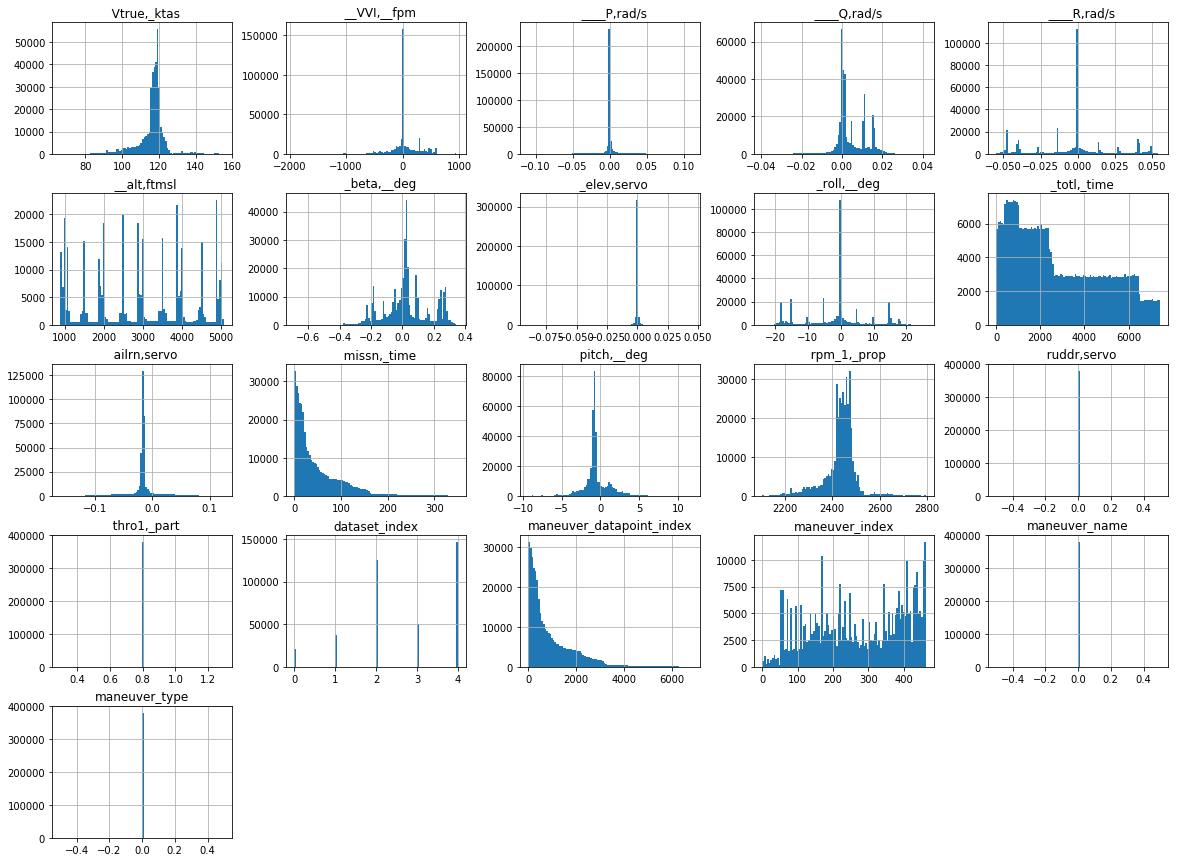

In [0]:
df.hist(bins=100, figsize=(20,15))
save_plots_before_show('state_histogramm')
plt.show()

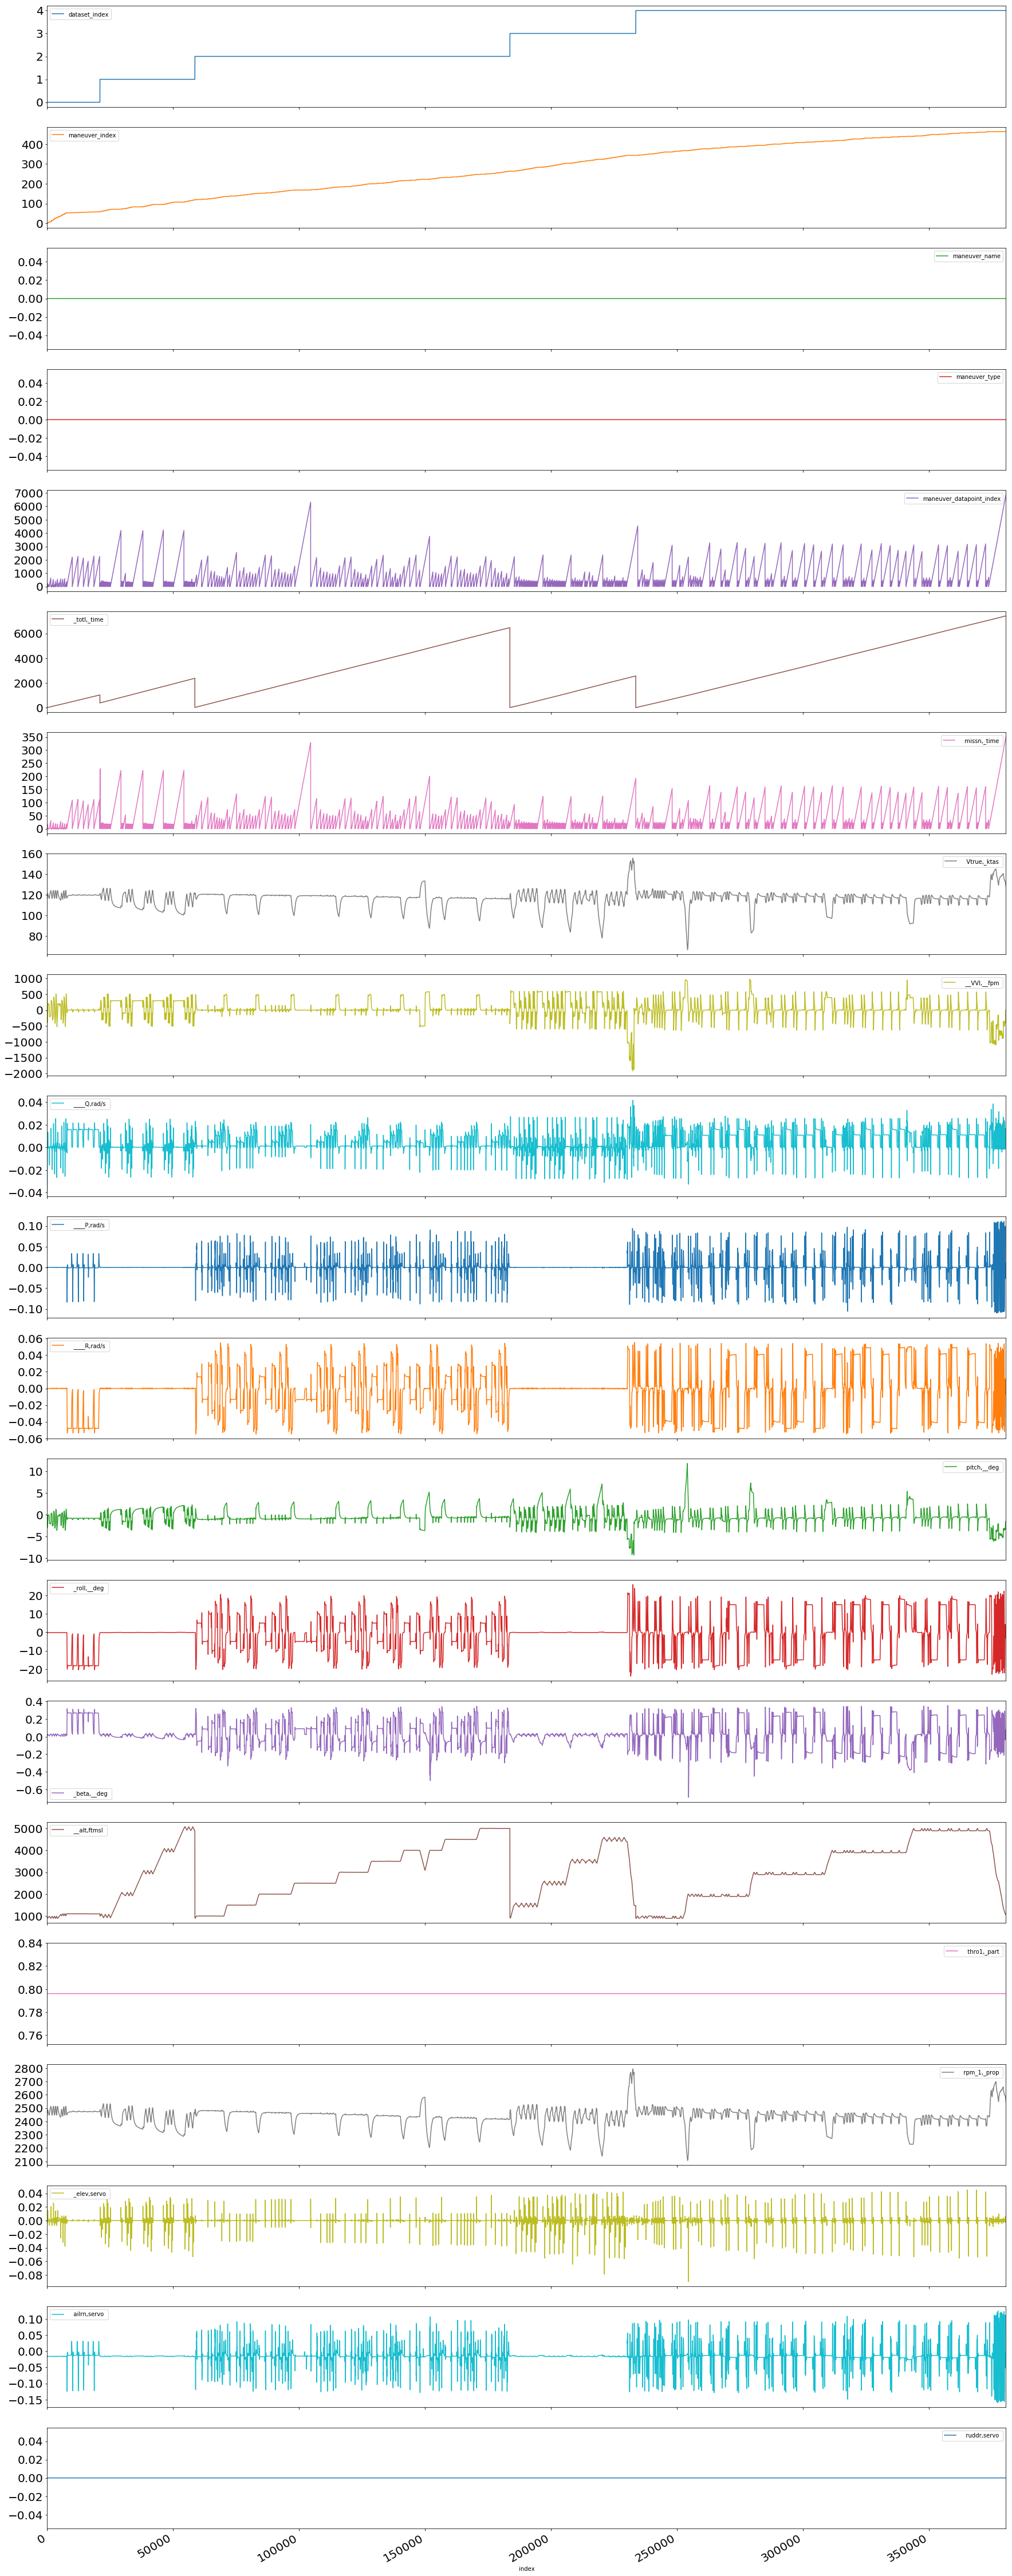

In [0]:
df.reset_index().plot.line(x='index', subplots = True, figsize = (30, 90),  fontsize=20,legend=True )
save_plots_before_show('state_timeline')
plt.show()